# Pre entrega nº1 - Lucas Esteban
## Análisis de satisfacción de clientes de una aerolínea

Este proyecto trata sobre las valoraciones de usuarios (si quedaron satisfechos con el vuelo o no) de una aerolínea. Se analizarán variables como edad, tipo de viaje, genero del cliente, clase del vuelo, distancia del vuelo, demora de partida, demora de llegada, entre otras variables que refieren a las comodidades y caracteristicas del vuelo.

### Hipótesis de interés:
- Las demoras de partida y llegada importan en la valoración del cliente.
- La edad tiene injerencia sobre la valoración.
- La clase y la distancia del mismo influye sobre la valoración, ya que a mayor viaje más necesarias serán las comodidades.

### Objetivo:
- Demostrar las hipótesis anteriormente planteadas mediante gráficos.
- Identificar las tendencias en los datos.

### Impacto:
- Entender que factores influyen con mayor peso en la satisfaccion de los clientes.
- Desarrollar nuevas estrategias para mejorar la cantidad de clientes satisfechos.

### Importo el dataframe

In [36]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [38]:
# Contar la cantidad de valores nulos en cada columna
nulos_por_columna = df.isnull().sum()

# Mostrar los resultados
print(nulos_por_columna)

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Se puede observar que la columna 'Arrival Delay in Minutes' tiene nulos asi que procedo a remplazar los nulos por la mediana y tambien elimino las columnas que no se van a utilizar.

In [39]:
columnas_a_eliminar = ["Unnamed: 0","id", "Cleanliness", "Baggage handling", "Leg room service", "On-board service"]

# Eliminación de las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

In [69]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis=0))

In [72]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
Checkin service                      0
Inflight service                     0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Se puede ver que ya no quedaron valores nulos en el dataframe

In [74]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.304290,3.640428,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.265396,1.175663,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Se pueden extraer las siguientes conclusiones:
-La edad promedio de los pasajeros es de 39.38 años.

-Los retrasos en la salida varían significativamente. La media indica que, en promedio, los vuelos tienen un pequeño retraso, pero la alta desviación estándar sugiere que algunos vuelos tienen retrasos muy largos.

-Similar a los retrasos en la salida, los retrasos en la llegada muestran una gran variabilidad, con una media que indica un retraso promedio pequeño.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# Gráficos

### Podemos empezar viendo el porcentaje de clientes satisfechos y no satisfechos

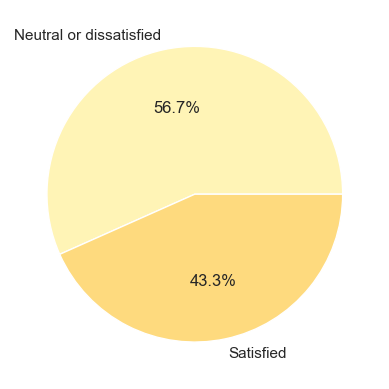

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Se puede ver que el 43,3% de los pasajeros esta satisfecho y el 56,7 no lo esta.

In [77]:
numeric_data = df.select_dtypes(include=['number'])
corr_mat = numeric_data.corr()
print(corr_mat)

                                        Age  Flight Distance  \
Age                                1.000000         0.099461   
Flight Distance                    0.099461         1.000000   
Inflight wifi service              0.017859         0.007131   
Departure/Arrival time convenient  0.038125        -0.020043   
Ease of Online booking             0.024842         0.065717   
Gate location                     -0.001330         0.004793   
Food and drink                     0.023000         0.056994   
Online boarding                    0.208939         0.214869   
Seat comfort                       0.160277         0.157333   
Inflight entertainment             0.076444         0.128740   
Checkin service                    0.035482         0.073072   
Inflight service                  -0.049427         0.057540   
Departure Delay in Minutes        -0.010152         0.002158   
Arrival Delay in Minutes          -0.012105        -0.002470   

                                   Infl

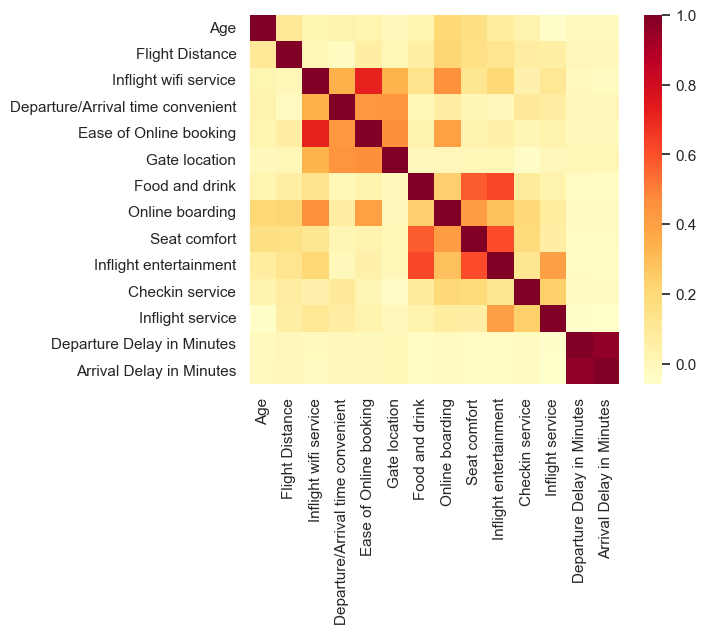

In [78]:
sns.heatmap(corr_mat, square = True, cmap = 'YlOrRd')
pass

Se puede ver que existe una fuerte correlación entre las características 'Retraso de salida en minutos' y 'Retraso de llegada en minutos'. El valor del coeficiente de correlación se podra observar con el siguiente calculo:

In [84]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.960247
Inflight wifi service       Ease of Online booking      0.715856
Food and drink              Inflight entertainment      0.622512
Seat comfort                Inflight entertainment      0.610590
Food and drink              Seat comfort                0.574556
dtype: float64

## Diagrama de dispersión

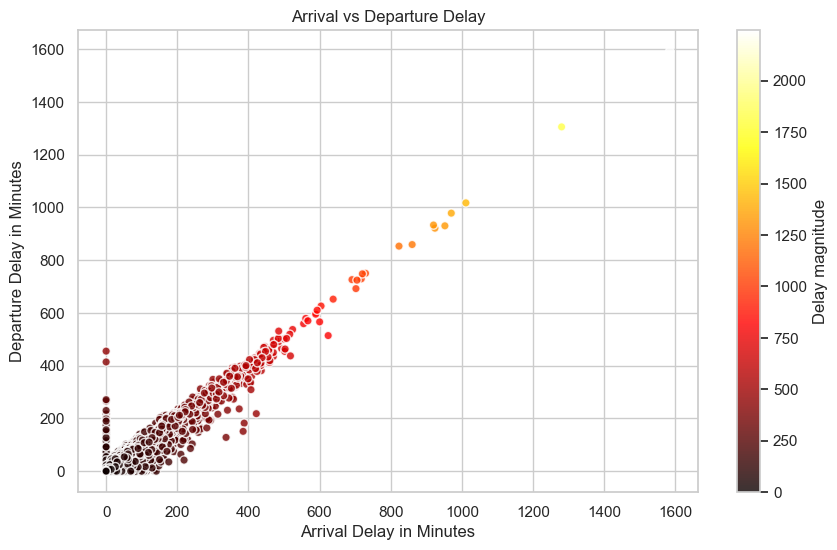

In [79]:
# Suponiendo que 'df' es tu DataFrame
import numpy as np
x = df['Arrival Delay in Minutes']
y = df['Departure Delay in Minutes']

# Crear una variable para los colores basada en alguna métrica (por ejemplo, el retraso en la llegada)
colors = np.sqrt(x**2 + y**2)  # Puede ser cualquier métrica que elijas

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, cmap='hot', alpha=0.8, edgecolor='w')

# Añadir etiquetas y título
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.title('Arrival vs Departure Delay')

# Mostrar la barra de colores
plt.colorbar(label='Delay magnitude')

plt.show()

Los resultados obtenidos son bastante lógicos y se pueden explicar de la siguiente manera. Si el vuelo de los clientes de la aerolínea se retrasó una cierta cantidad de tiempo en la salida, entonces el vuelo se retrasará aproximadamente la misma cantidad de tiempo en el aterrizaje. 

## Gráfico de lineas segun edad y satisfaccion

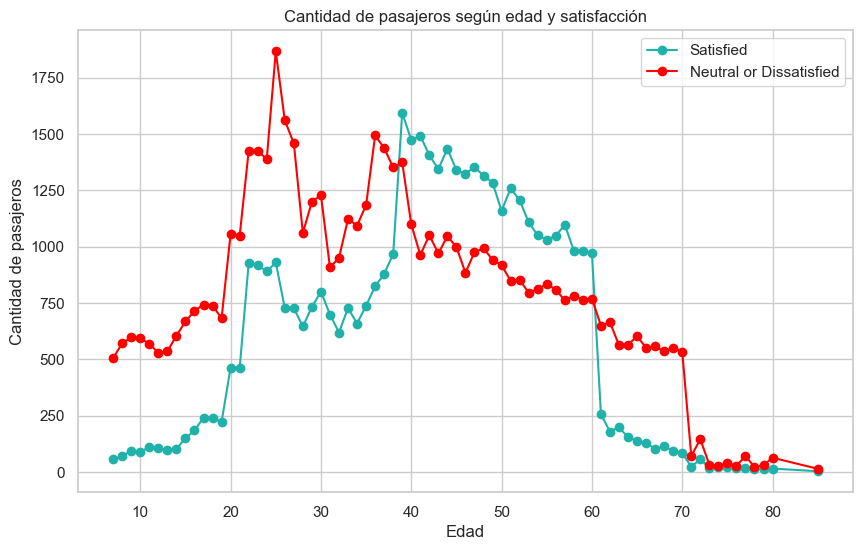

In [80]:
filtered_df = df[df['satisfaction'].isin(['neutral or dissatisfied', 'satisfied'])]

# Agrupa por 'Age' y 'satisfaction' y cuenta las ocurrencias
age_satisfaction_count = filtered_df.groupby(['Age', 'satisfaction']).size().unstack()

# Crea el gráfico lineal
plt.figure(figsize=(10, 6))

# Línea para 'satisfied'
plt.plot(age_satisfaction_count.index, age_satisfaction_count['satisfied'], label='Satisfied', color='lightseagreen', marker='o')

# Línea para 'neutral or dissatisfied'
plt.plot(age_satisfaction_count.index, age_satisfaction_count['neutral or dissatisfied'], label='Neutral or Dissatisfied', color='red', marker='o')

# Añade títulos y etiquetas
plt.title('Cantidad de pasajeros según edad y satisfacción')
plt.xlabel('Edad')
plt.ylabel('Cantidad de pasajeros')
plt.legend()

# Muestra el gráfico
plt.show()

Se puede ver que los clientes mas jovenes tienden a estar menos satisfechos y que aproximadamente entre los 40 y 60 años esa tendencia se da vuelta.

## Gráficos segun distancia de vuelo y tipo de clase

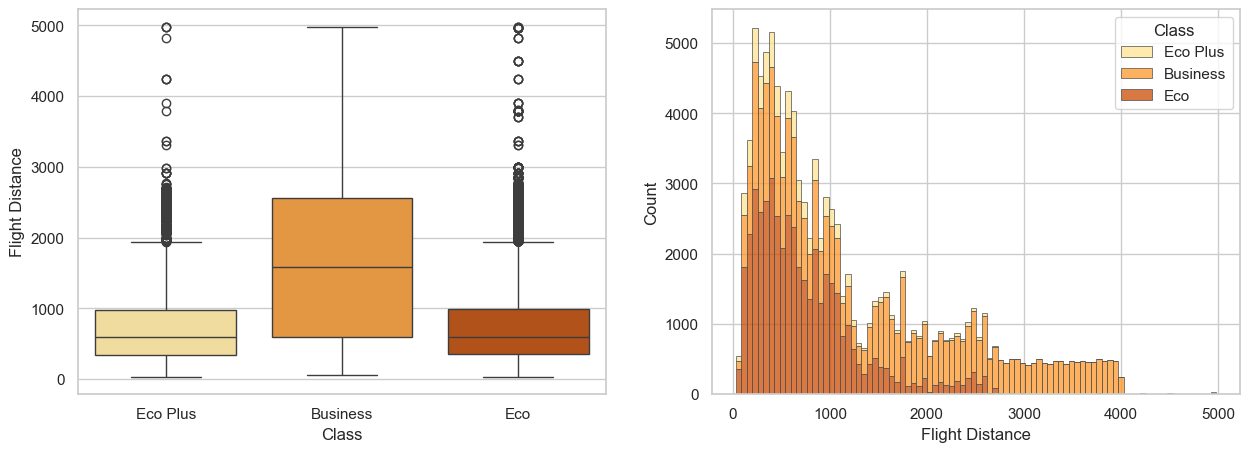

In [81]:
# Configurar la figura con seaborn
sns.set(style="whitegrid")

# Crear un subplot con 2 gráficos en una fila
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de boxplot, ajustando el `hue` y desactivando la leyenda
sns.boxplot(x="Class", y="Flight Distance", hue="Class", palette="YlOrBr", data=df, ax=ax[0], dodge=False, legend=False)

# Gráfico de histplot, no necesita ajuste ya que `hue` está asignado
sns.histplot(df, x="Flight Distance", hue="Class", multiple="stack", palette="YlOrBr", edgecolor=".3", linewidth=.5, ax=ax[1])

# Mostrar los gráficos
plt.show()

De este diagrama de caja se puede extraer la siguiente conclusión: los clientes cuya distancia de vuelo es larga, en su mayoría vuelan en clase ejecutiva.

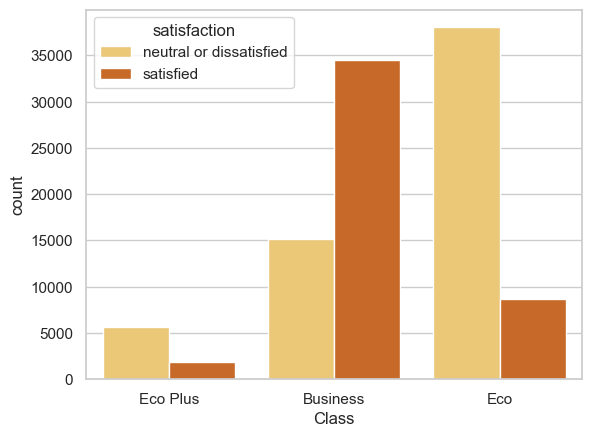

In [82]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

En este gráfico se puede ver muy evidente que la mayoría de los pasajeros que volaron en clase económica plus o económica no estaban satisfechos con el vuelo, y los que tuvieron la suerte de volar en clase ejecutiva estaban satisfechos.

### Conclusiones:
-Se pudo ver que la influencia de la edad en la satisfacción no es algo concluyente pero muestra ciertas tendencias segun ciertos rangos de edad.

-Los tiempos de demora tanto de partida como de llegada son muy influyentes en la satisfaccion o no de los clientes.

-El factor de en que clase viaja el usuario tambien tiene un peso significativo , sobre todo en vuelos de largas distancias, ya que la clase ejecutiva es mas elegida para viajes largos.